# Scientific Programming with Python 
## Assignment 1 - 2025W

**Associate Prof. Dr. Sascha Hunold** \
Research Group for Parallel Computing \
Faculty of Informatics \
TU Wien  

---

## Student data

1. Shakira Fibi Pannier (12509817)
2. Stefan Moser (12025955)
3. Eric Ettlinger (12202318)

---

## General Comments

- Implement the code for each task directly in the cell below the corresponding task description.
- Adhere closely to the instructions.
- See **Lecture 1** for an explanation of functions using `**kwargs`.
---

In [1]:
# this is just for making sure that plots will be inserted inline
%matplotlib inline

## Task 1 (2 points) - Compute your Course Grade

You should have received the grading scheme for this course in the lecture (see the introductory slide set on TUWEL). 

Now, it is your task to compute the final grade for exactly one student.

Implement the following function:
```python
def grade_student(pa, mpa, pe, mpe):
    '''
    compute final grade

    :param int pa: total number of points received in assignments
    :param int mpa: maximum number of points to be achieved in assignments
    :param int pe: total number of points received in the last exam
    :param int mpe: maximum number of points to be achieved in the last exam
    :return: the grade, which is either 1, 2, 3, 4, or 5 
    :rtype: int
    '''
```    
### Rules
- Make sure that the overall percentage is rounded to two decimal digits before you assign the grade.
- The points scored (`pa`, `pe`) will be in the range $[0, 100]$, and both will not exceed the corresponding maximum values `mpa` and `mpe`.


In [2]:
def grade_student(pa, mpa, pe, mpe):
    grade = 5
    if (pa < 0 or pa > 100) and (pe < 0 or pe > 100):
        return ValueError("Points scored must be in the range [0, 100]")
    overall_percentage = (pa / mpa) * 0.4 + (pe / mpe) * 0.6
    overall_percentage = round(overall_percentage, 2)
    if overall_percentage >= 0.9:
        grade = 1
    elif 0.75 <= overall_percentage < 0.9:
        grade = 2
    elif 0.6 <= overall_percentage < 0.75:
        grade = 3
    elif 0.5 <= overall_percentage < 0.6:
        grade = 4
    return grade

In [3]:
# possible test cases
students = [
    (55, 24),
    (40, 20),
    (59, 14),
    (60, 29)
]

for pa, pe in students:
    print(grade_student(pa, 60, pe, 30))

2
3
3
1


## Task 2 (10 points) - Plot Polynomials with ``interact``

Your task is to plot an arbitrary function of the form $$f(x)=c_1*x^m+c_2*x^{m-1}+\ldots+c_{m}*x+c_{m+1}$$ in the interval **[-5, 5]**, **dynamically** (the number of summands may vary based on the input, see **Example** below).

Use the interact controls for Jupyter and Python. See https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html for examples.

Implement the function
```python
def make_interactive_plot(eq):
```
which takes a string with an equation as input and should return a set of widgets and an interactive plot.


### Rules
- For each of the coefficients, provide an `IntSlider` with values in $$\{0,1,2,\ldots,10\},$$ where the default value is 2. The sliders should be labeled with the name of the coefficient (`description`).
- Coefficients in equations are either in the form `c+INT` (such as `c1`, `c121`, etc.) or could be represented by a letter from the English alphabet {`a`, `b`, ..., `z`} (except `x`), but only one form will be used within an equation.
- In cases where coefficients are in the form `c+INT`, the values do not have to start from 1 or be increasing; for example, `c3 * x + c5 * x**2` is allowed.
- The variable `x` is reserved, and only `x` will be used as the variable in equations; e.g., `y * x` is a legal equation.
- The superscript value is always an integer.
- Whitespaces in the equations between different expressions are allowed, e.g., the following equations are all legal inputs (this is not an exhaustive list):
  - `a*x**2+b*x+c`
  - `a * x**2+b*x+c`
  - `a * x**2 + b*x+c`
  - `a * x**2 + b*x + c`
  
### Hints
- Equations can be evaluated using the `eval` function, e.g., you may use `eval(c1*x + c2)`.
- `interact` provides the `interactive_output` function, which you can call with a dynamic list of arguments (the `IntSlider`s).

### Example

Calling
```
make_interactive_plot("c1 * x**3 + c2 * x**2 + c3 * x + c4")
```
should produce the following widgets and plot:

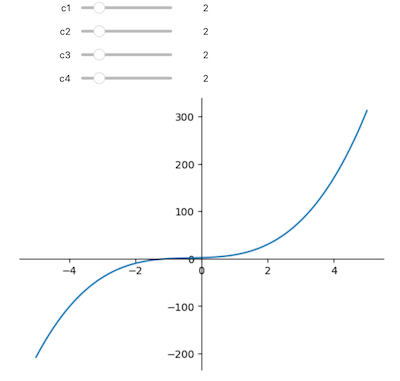

In [4]:
from IPython.display import Image, display

display(Image(filename="/home/jovyan/shared/191.125-2025W/assignment1/dynamic_interact.png"))
#display(Image(filename="shared/shared/191.125-2024W/assignment1/dynamic_interact.png"))

In [15]:
# we need these imports for this task
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

arguments to fun: {'c1': 10, 'c2': 1}
x [-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]
y [41.         25.19753086 13.34567901  5.44444444  1.49382716  1.49382716
  5.44444444 13.34567901 25.19753086 41.        ]


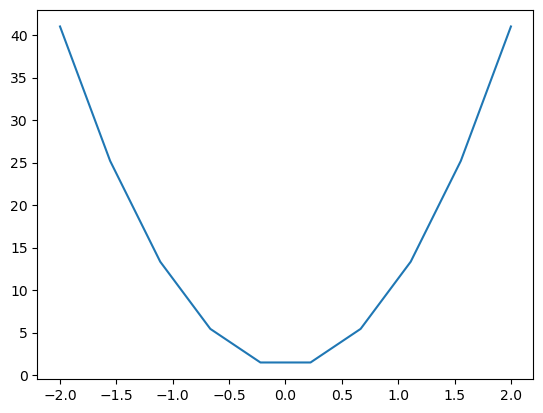

In [16]:
# This sample code should help you with this task.

# Of course, you can solve the task differently. But this code snippet might come in handy.
def fun(equation, args):
    print("arguments to fun:", args)

    x = np.linspace(-2, 2, 10)
    args["x"] = x
    # now, we evaluate the "equation"
    # we basically execute this Python code snippet
    # args provides the values for c1, c2, and x
    y = eval(equation, args)

    print("x", x)
    print("y", y)
    fig = plt.figure()
    plt.plot(x, y)
    plt.show()


# I would like to pass a few variables to function 'fun'
# I put them in a dictionary
# the goal is to execute the polynomial function
myargs = {
    "c1": 10,
    "c2": 1
}
fun("c1 * x**2 + c2", myargs)

In [17]:
def make_interactive_plot(eq: str) -> None:
    l = eq.rsplit("+")
    l = [el.replace(" ", "") for el in l]
    l = [el.split("x") for el in l]
    for i in range(len(l)):
        l[i] = [el.replace("*", "") for el in l[i]]
        l[i] = [el.replace("^", "") for el in l[i]]

    for i in range(len(l)):
        if len(l[i]) == 1:
            l[i].append("0")  # Append exponent 0 if missing
    coefficients = []
    exponents = []
    for l, r in l:
        if r == "":
            r = "1"
        if l == "":
            l = "1"
        coefficients.append(l)
        exponents.append(int(r))

    coefficient_names = [f"{coefficient}" for coefficient in coefficients]
    sliders = {key: IntSlider(min=0, max=10, step=1, value=2, description=f"{key}") for key in coefficient_names}

    def fun_plot(exps, names, **sliders) -> None:
        x = np.linspace(-5, 5, 1000)
        res = np.zeros_like(x)
        for i, name in enumerate(names):
            value = sliders[name]
            exp = exps[i]
            res += value * x ** (exp)
        plt.plot(x, res)
        plt.xlim(-5, 5)
        plt.title(f"Plot of the polynomial: {eq}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.show()

    def wrapper(**sliders):
        return fun_plot(exponents, coefficient_names, **sliders)

    interact(wrapper, **sliders)

#make_interactive_plot("c3*x + c2*x**2+c4")

#make_interactive_plot("c1 * x**3 + c2 * x**2 + c3 * x + c4")

In [20]:
make_interactive_plot("c1010*x^3 + c4*x^1 + c9")
make_interactive_plot("a*x**3+b*x**2+c*x+d")
make_interactive_plot("y*x**3")

interactive(children=(IntSlider(value=2, description='c1010', max=10), IntSlider(value=2, description='c4', ma…

interactive(children=(IntSlider(value=2, description='a', max=10), IntSlider(value=2, description='b', max=10)…

interactive(children=(IntSlider(value=2, description='y', max=10), Output()), _dom_classes=('widget-interact',…

## Task 3 (10 points) - Plot Tube Lines of Vienna

Now, you will plot the city map of Vienna and the routes of the subway lines in Vienna. We provide the following code that reads and draws the polygons of the individual districts of Vienna. 

We also provide a CSV file containing information about means of public transportation in Vienna from https://www.data.gv.at (Katalog Öffentliches Verkehrsnetz Linien Wien). 

### Rules

1. You need to read the file that contains the coordinates of the subway lines of Vienna, which can be found in `./shared/191.125-2025W/assignment1/OEFFLINIENOGD.csv`.
    - The column `LBEZEICHNUNG` in this file contains a label denoting the actual line, e.g., `U1`, `U2`, etc.
    - In the column `SHAPE`, you can find a list of tuples of `x` and `y` coordinates for different subway segments. For example, several segments may exist for the subway line `U1`.
3. Extract the coordinates of all segments for each subway line.
4. Plot the route of each segment for each subway line. Make sure that you plot segment by segment.

Your solution has to work for the subway lines U1, U2, U3, U4, and U6, e.g., `plot_tube_line(csv_file, "U2")` must work.
In addition, your code should also work for an arbitrarily named subway line, which could be called "UX" or "UY" or even "U10".  
We have a modified CSV file with artificially created subway lines. We will run your code with this file as well.

Here, you are free to use external libraries, such as `pandas` for data handling. If desired, you can write support functions for the implementation of the required function `plot_tube_line()`.


### Requirements

- Ensure that your solution works for any CSV file formatted similarly to `./shared/assignment1/OEFFLINIENOGD.csv`.
- Points will be deducted if the code contains hardcoded subway lines or segment coordinates.

In your code, retrieve the color for a subway line by calling the function `get_subway_color(subway_line)`, where `subway_line` is the name of the subway. This function takes a string as an argument and returns the RGB-encoded color for that subway line.


### Additional Comments
- The CSV file also contains data for other means of transportation (bus, tram). You can ignore this data.

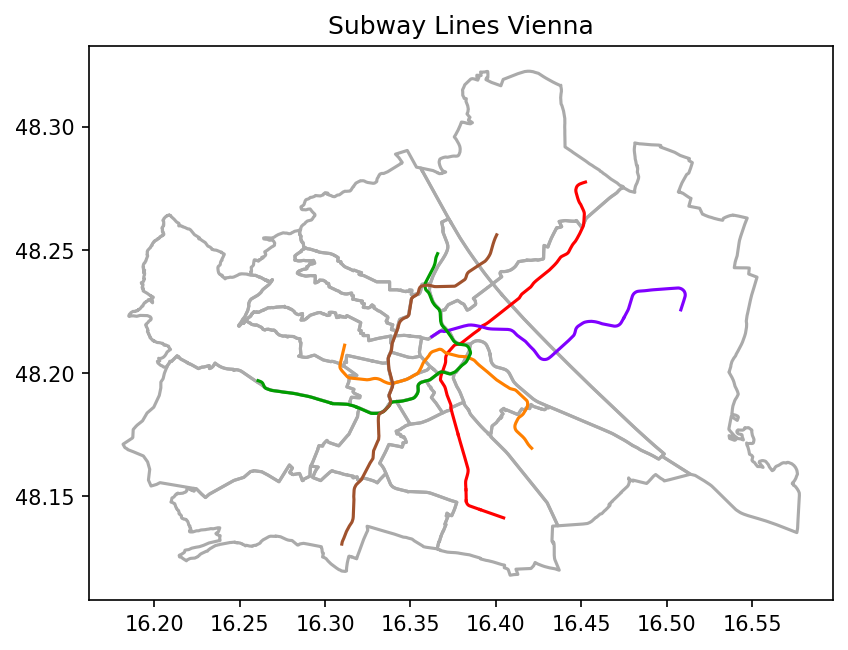

In [11]:
import shapefile as shp
import matplotlib.pyplot as plt
import pandas as pd


def plot_vienna_map():
    sf = shp.Reader("/home/jovyan/shared/191.125-2025W/assignment1/vienna/BEZIRKSGRENZEOGDPolygon.shp", encoding="latin1")
    #sf = shp.Reader("shared/shared/191.125-2024W/assignment1/vienna/BEZIRKSGRENZEOGDPolygon.shp", encoding="latin1")

    plt.figure(dpi=150)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, '-', color='#aaaaaa')


def get_subway_color(subway_line):
    u2col = {
        "U1": '#ff0000',
        "U2": '#8000ff',
        "U3": '#ff8000',
        "U4": '#009d00',
        "U6": '#A0522D'
    }

    col = '#540CF2'  # default

    if subway_line in u2col:
        col = u2col[subway_line]

    return col


# HERE: complete the code

def plot_tube_line(csv_file, subway_line):
    #read data
    df = pd.read_csv(csv_file, sep=',', header=0)
    # get only the rows for the specified subway line
    # Filter nur Zeilen mit gesuchter Linie
    df_line = df[df['LBEZEICHNUNG'] == subway_line]
    if df_line.empty:
        print(f"Keine Einträge für Linie {subway_line} in {csv_file}")
        return
    # get coordinates for each segment and plot them
    coordinates = df_line['SHAPE'].tolist()
    for shape_str in coordinates:
        # convert string representation of list of tuples to actual list of tuples
        shape_str = shape_str.replace("LINESTRING (", "").replace(")", "")
        shape_parts = shape_str.split(", ")
        x_list = []
        y_list = []
        for i in range(len(shape_parts)):
            shape_parts[i] = shape_parts[i].strip()
            x, y = shape_parts[i].split(" ")
            x_list.append(float(x))
            y_list.append(float(y))
        plt.plot(x_list, y_list, '-', color=get_subway_color(subway_line))
    plt.title(f"Subway Lines Vienna")


plot_vienna_map()

# this is the test code
csv_file = "/home/jovyan/shared/191.125-2025W/assignment1/OEFFLINIENOGD.csv"
#csv_file = "./shared/shared/191.125-2024W/assignment1/OEFFLINIENOGD.csv"
plot_tube_line(csv_file, "U1")
plot_tube_line(csv_file, "U2")
plot_tube_line(csv_file, "U3")
plot_tube_line(csv_file, "U4")
plot_tube_line(csv_file, "U6")

## Task 4 (3+3 points) - Intersection of Two Lists of Lists

In this task, you will efficiently compute the intersection of two lists.

### Input

You are given the function `read_points(csv_file)`, which reads in student data from a `csv_file`, where each line represents one student.  This function `read_points` returns a list of lists, where each element in the outer list represents a student data item. 
A student is characterized by a list with the following entries `[ID, first name, last name, points]`.

For example, the first five entries of a CSV file may look like this:
```python
[['3594', 'Robert', 'Davey', '12'], ['5055', 'Ştefan', 'Lichtenstein', '88'], ['2932', 'Oswald', 'Conner', '91'], ['906', 'Fareed', 'Deacon', '33'], ['461', 'Roman', 'Castillo', '10']]
```
In this case, 'Robert Davey' has student ID `3594` and has gotten `12` points (in some imaginary exam).

Now, you are given two datasets `data1` and `data2`, and each of these datasets stores the points that a student has obtained in exam1 and exam2, respectively.

### Output

The function `intersect(list_of_names1, list_of_names2)` should return the intersection of `list_of_names1` and `list_of_names2` by `ID`. Thus, for each `ID` in `list_of_names1` that is also found in `list_of_names2`, the resulting list should contain `[ID, first name, last name, points1, points2]`, where `points1` denotes the points from `data1` and `points2` denotes the points from `data2`.

### Rules

- Ensure that `data1` and `data2` must not be altered during the merge operation, i.e., the elements before and after the operation must be identical.
- You must not use any external libraries that provide this functionality (such as `pandas`). You are supposed to solve this task with Standard Python.

### Example

Let `data1` contain the following data:
```python
[['3594', 'Robert', 'Davey', '12'], ['5055', 'Ştefan', 'Lichtenstein', '88']]
```
and `data2` contains 
```python
[['3594', 'Robert', 'Davey', '20'], ['461', 'Roman', 'Castillo', '10']]
```
the resulting output list will be as follows
```python
[['3594', 'Robert', 'Davey', '12', '20']]
```

### Points
- You will earn 3 points if your function `intersect` returns the correct answer.
- You will earn the remaining 3 points of your function `intersect` runs in less than 0.5 second on the JupyterHub server.

### Additional Notes

The names listed in `./shared/191.125-2025W/assignment1/p{1|2}_data.csv` are entirely fictional and randomly generated from dataset found under the following [URL](https://www.opendataportal.at/katalog/dataset/0303f8aa-dc89-48a0-9f82-b58e29780449#resources).

In [12]:
import time


def intersect(list_of_names1, list_of_names2):
    # Create a dictionary for quick lookup from list_of_names2
    data2_dict = {entry[0]: entry[1:] for entry in list_of_names2}
    result = []

    # Check each entry in list_of_names1
    for entry in list_of_names1:
        student_id, _, _, _ = entry
        if student_id in data2_dict:
            _, _, points2 = data2_dict[student_id]
            result.append(entry + [points2])

    return result


def read_points(csv_file):
    data = []
    with open(csv_file, encoding='latin1') as fh:
        content = fh.readlines()
        # skip header line
        for i in range(1, len(content)):
            line = content[i].strip()
            items = line.split(";")
            data.append(items)
    return data


data1 = read_points("shared/191.125-2025W/assignment1/p1_data.csv")
data2 = read_points("shared/191.125-2025W/assignment1/p2_data.csv")
#data1 = read_points("shared/shared/191.125-2024W/assignment1/p1_data.csv")
#data2 = read_points("shared/shared/191.125-2024W/assignment1/p2_data.csv")

print("first 10 persons in data1")
print(data1[0], '\n')

print("number of persons on data1: %d" % (len(data1)))
print("number of persons on data2: %d" % (len(data2)))

start = time.perf_counter()
dataj = intersect(data1, data2)
end = time.perf_counter()
print(f"Time taken for intersection: {end - start:.6f} seconds")

if dataj:
    print("number of persons in data_joined: %d" % (len(dataj)))
    print("first 10 persons in data_joined")
    print(dataj[0:10])





first 10 persons in data1
['11309', 'Stefan', 'Krieg', '12'] 

number of persons on data1: 9000
number of persons on data2: 10500
Time taken for intersection: 0.003740 seconds
number of persons in data_joined: 6257
first 10 persons in data_joined
[['11309', 'Stefan', 'Krieg', '12', '58'], ['3594', 'Robert', 'Davey', '12', '83'], ['5055', 'Å\x9etefan', 'Lichtenstein', '88', '55'], ['906', 'Fareed', 'Deacon', '33', '48'], ['461', 'Roman', 'Castillo', '10', '55'], ['6830', 'Mirjam', 'McLean', '2', '79'], ['6763', 'Florentina', 'Shiomi', '73', '20'], ['14207', 'Mirjam', 'Sandner', '27', '89'], ['10888', 'Ferdinand', 'Alechinsky', '58', '82'], ['7637', 'Uros', 'Gechtman', '50', '61']]


## Task 5 (6 points) - Process PDB files

The RCSB Protein Data Bank (PDB) (https://www.rcsb.org/) holds a large collection of molecular structures that can be used for various scientific purposes. The compounds found in this database can be downloaded in different file formats, e.g., `.pdb` or `.cif`.

In this exercise, we will focus on `.cif` files. These CIF files contain a section where the locations of all atoms are defined, and these definitions start with the keyword "ATOM." For example, in our test case, the first atom is defined as follows:

```
ATOM   1    N  N   . LYS A 1 1   ? 3.195   10.133 9.817  1.00 5.98  ? 1    LYS A N   1
```
In this example, the atom with ID 1 is a nitrogen atom and is located at the coordinates (3.195, 10.133, 9.817).

### Goal / Rules
The goal is to complete the function 
```python
    function_get_distances(cif_file_name, ref_atom_id, max_nb_atoms)
```

The function should compute the *Euclidean* distance between the atom with ID `ref_atom_id` and all other atoms found in `cif_file_name`. The function should return the atom IDs and their distances to `ref_atom_id`, limited to the closest `max_nb_atoms` atoms.

In this exercise, you can use any external library. If needed, you can define additional support functions. Note that we have completed this task by simply parsing the CIF file using standard Python functionality. However, you are free to use another library. If you do, you need to add the installation procedure into the Jupyter notebook, e.g.,

```
!pip install EXTERNAL_LIBRARY
```
The notebook should be runnable on the provided JupyterHub installation without additional modifications. What we cannot execute will not be graded.

### Input

The function `function_get_distances` takes as inputs 
- the name (path) of a CIF file (`cif_file_name`) 
- an `ref_atom_id`, and
- the `max_nb_atoms`, which returns the maximum number of atoms returned by the function. The value of `max_nb_atoms` is always defined and strictly larger than 0.

### Output

The function `function_get_distances` should return a list of tuples, where each tuple is composed of an atom id and the distance, e.g., `(3, 2.34)`.

- The function should not compute the distance of `ref_atom_id` to itself.
- The distance values should be **rounded to two decimal places**.
- The list of tuples must be **sorted by increasing distance** (ties are broken by atom ID, smaller atom IDs coming first).
- The list contains at most `max_nb_atoms` atoms.

## Example Output
This example only contains fantasy values, but it shows the general structure of a solution.
```
[ (4, 1.23), (2, 5.12), (5, 5.12), (3, 9.34) ]
```

In [14]:
import math


def read_cif_file(cif_file_name):
    #read cif file and return a dictionary of atom IDs and their coordinates
    with open(cif_file_name, encoding='utf-8') as f:
        lines = f.readlines()

    atoms = []
    for line in lines:
        if line.startswith("ATOM"):
            atoms.append(line.strip().split())

    atoms_dict = {int(entry[1]): [float(coord) for coord in entry[10:13]] for entry in atoms}

    return atoms_dict


def function_get_distances(cif_file_name, ref_atom_id, max_nb_atoms):
    '''returns a list of tuples, where each tuple consists of an atom ID != ref_atom_id 
       and the distance of atom ID to the ref_atom_id. The list of tuples must be sorted 
       by distance and contains at most max_nb_atoms entries.       
    '''

    atoms_dict = read_cif_file(cif_file_name)

    # check if ref_atom_id exists
    if ref_atom_id not in atoms_dict:
        raise ValueError(f"Reference atom ID {ref_atom_id} not found in CIF file.")

    x_ref, y_ref, z_ref = atoms_dict[ref_atom_id]

    distances = []

    # compute distances
    for atom_id, (x, y, z) in atoms_dict.items():
        if atom_id == ref_atom_id:
            continue

        dx = x - x_ref
        dy = y - y_ref
        dz = z - z_ref

        dist = math.sqrt(dx * dx + dy * dy + dz * dz)
        distances.append((atom_id, round(dist, 2)))

    # sort by distance, then by atom ID
    distances.sort(key=lambda t: (t[1], t[0]))

    return distances[:max_nb_atoms]


print(function_get_distances("/home/jovyan/shared/191.125-2025W/assignment1/1GWD.cif", 1, 10))
print(function_get_distances("/home/jovyan/shared/191.125-2025W/assignment1/1GWD.cif", 1, 5))

[(2, 1.48), (3, 2.41), (5, 2.43), (4, 2.76), (316, 2.91), (10, 3.53), (6, 3.8), (323, 4.04), (326, 4.06), (315, 4.15)]
[(2, 1.48), (3, 2.41), (5, 2.43), (4, 2.76), (316, 2.91)]
